<a href="https://colab.research.google.com/github/sxs001/L4DA_resources/blob/main/sarima_final_min_temp_pdqPDQ_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
#from tqdm import tqdm_notebook
from tqdm.notebook import tqdm
import tqdm as tqdm
import numpy as np
import pandas as pd
from itertools import product
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
url='https://raw.githubusercontent.com/tdmhub/L4DA_resources/main/daily-min-temperatures.csv'
data = pd.read_csv(url,delimiter=',')
data.head(3)


,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8


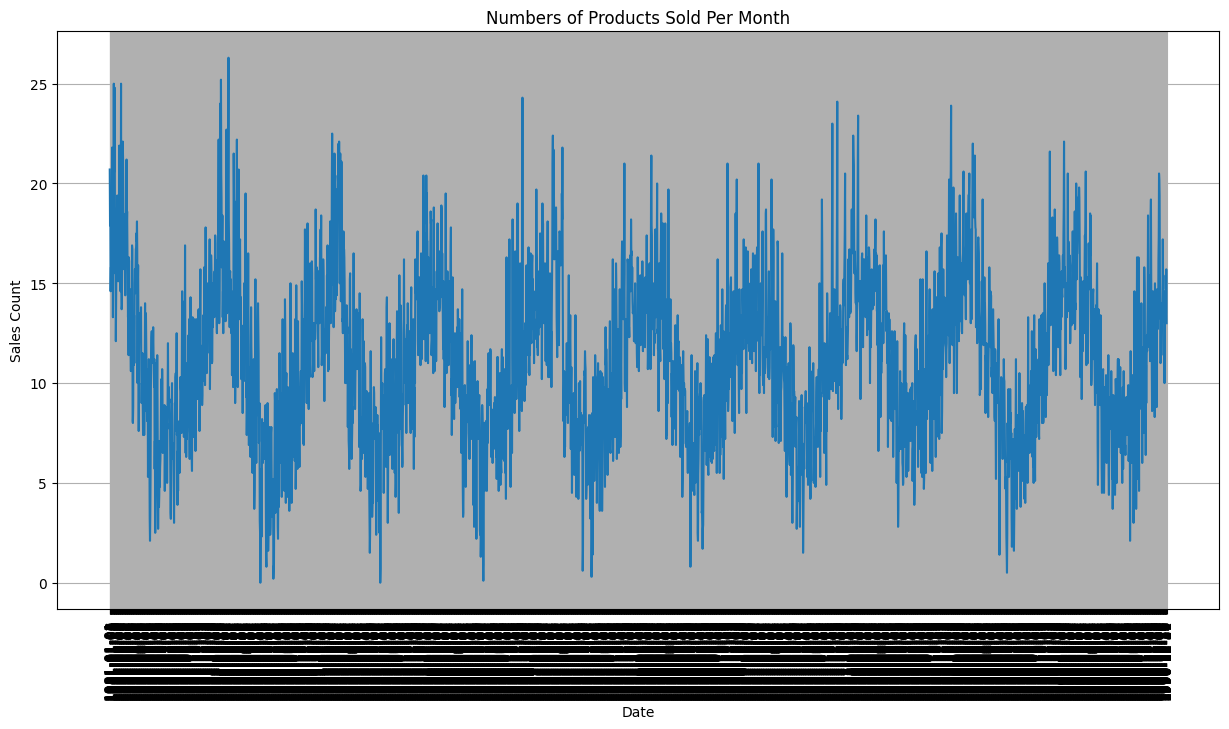

In [3]:
plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
plt.plot(data['Date'], data['Temp'])
plt.title('Numbers of Products Sold Per Month')
plt.ylabel('Sales Count')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [4]:
data["Date"] = pd.to_datetime(data["Date"])
#data["month_year_idx"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)




In [ ]:
data

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


In [5]:
monthly_data = data.resample('M').mean()

# Now, you can use seasonal_decompose on the 'monthly_data' DataFrame
result_add = seasonal_decompose(monthly_data['Temp'], model='additive', extrapolate_trend='freq'),

In [6]:
monthly_data

,Temp
Date,
1981-01-31,17.712903
1981-02-28,17.678571
1981-03-31,13.500000
1981-04-30,12.356667
1981-05-31,9.490323
...,...
1990-08-31,7.825806
1990-09-30,9.166667
1990-10-31,11.345161


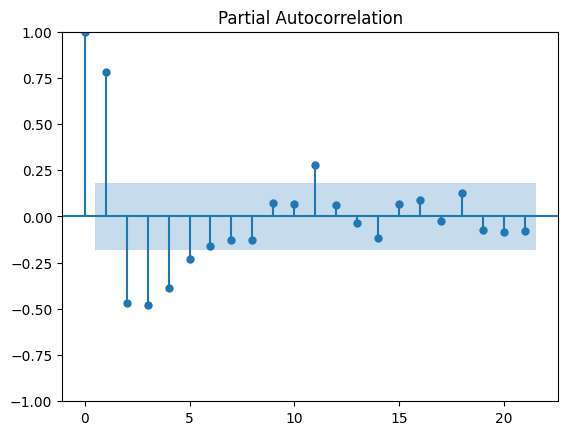

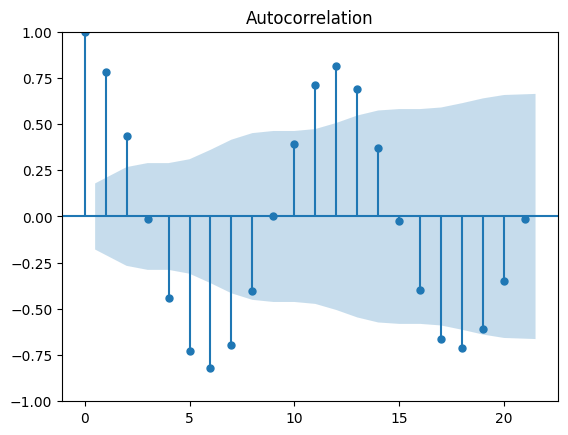

In [7]:
plot_pacf(monthly_data);
plot_acf(monthly_data);

ACF gradually decreasing
PACF cuts after x lag.
Suggests AR (x)


ACF cuts after x lag  
PACF gradual decresaing
MA(x)



In [8]:
ad_fuller_result = adfuller(monthly_data['Temp'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic_result = adfuller(monthly_data['Temp'])
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

======= ADF raw results=====
(-1.8923126029292998, 0.33568610206497607, 13, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 314.6487162773361)
======= ADF raw results=====
ADF Statistic: -1.8923126029292998
p-value: 0.33568610206497607
series is NOT stationary p_value=0.33568610206497607


In [ ]:
data.columns

Index(['Temp'], dtype='object')

In [9]:
data_diff_series=monthly_data['Temp'].diff(1)

In [10]:
data_diff_series

Date
1981-01-31         NaN
1981-02-28   -0.034332
1981-03-31   -4.178571
1981-04-30   -1.143333
1981-05-31   -2.866344
                ...   
1990-08-31   -0.358065
1990-09-30    1.340860
1990-10-31    2.178495
1990-11-30    1.311505
1990-12-31    1.711075
Freq: M, Name: Temp, Length: 120, dtype: float64

In [11]:
data['Temp']

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64

In [14]:
data_diff_df=pd.DataFrame(data_diff_series)
data_diff_df

,Temp
Date,
1981-01-31,NaN
1981-02-28,-0.034332
1981-03-31,-4.178571
1981-04-30,-1.143333
1981-05-31,-2.866344
...,...
1990-08-31,-0.358065
1990-09-30,1.340860
1990-10-31,2.178495


In [15]:
data_diff_df.dropna(inplace=True)

In [16]:
data_diff_df

,Temp
Date,
1981-02-28,-0.034332
1981-03-31,-4.178571
1981-04-30,-1.143333
1981-05-31,-2.866344
1981-06-30,-2.183656
...,...
1990-08-31,-0.358065
1990-09-30,1.340860
1990-10-31,2.178495


In [17]:
ad_fuller_result = adfuller(data_diff_df['Temp'])
alpha=0.05
print("======= ADF raw results=====")
print(ad_fuller_result)
print("======= ADF raw results=====")
adf_statistic=ad_fuller_result[0]
p_value=ad_fuller_result[1]
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
if (p_value < alpha):
    print(f'series is stationary p_value={p_value}')
else:
    print(f'series is NOT stationary p_value={p_value}')

======= ADF raw results=====
(-4.629576365009935, 0.00011389116578308203, 12, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, 314.6084436365842)
======= ADF raw results=====
ADF Statistic: -4.629576365009935
p-value: 0.00011389116578308203
series is stationary p_value=0.00011389116578308203


In [18]:
ad_fuller_result[1]

0.00011389116578308203

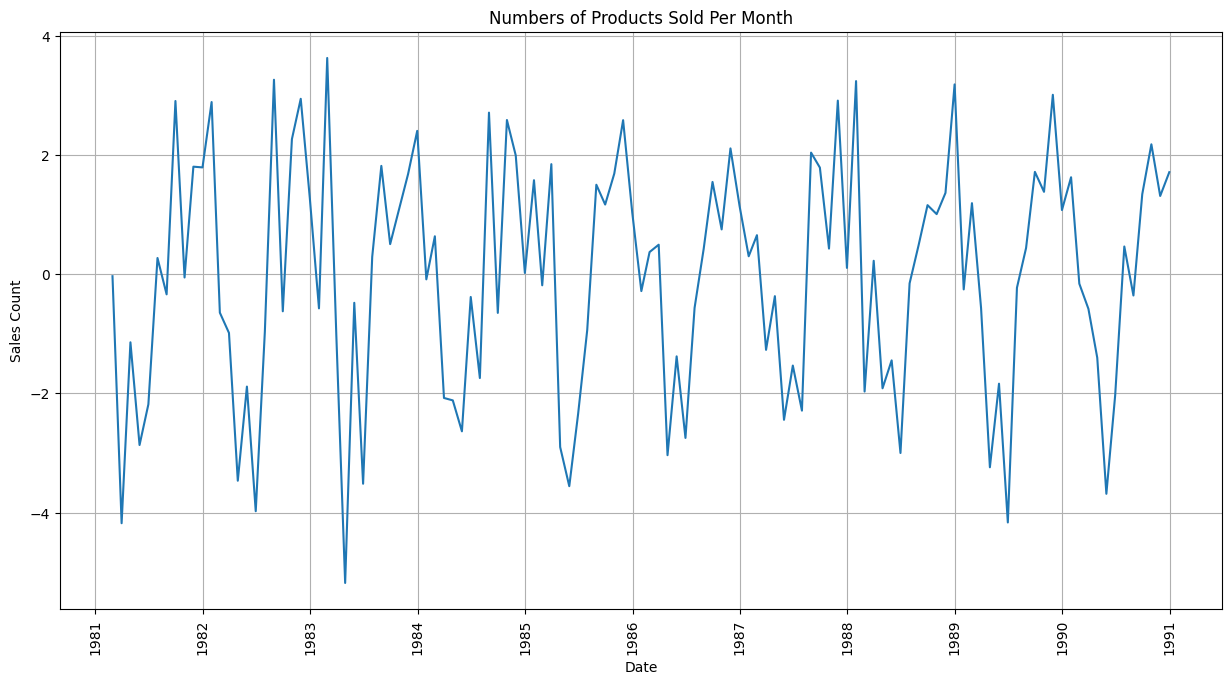

In [19]:
plt.figure(figsize=[15, 7.5]);
plt.plot(data_diff_df.index, data_diff_df['Temp'])
plt.title('Numbers of Products Sold Per Month')
plt.ylabel('Sales Count')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Amplitude compressed using log but still increasing

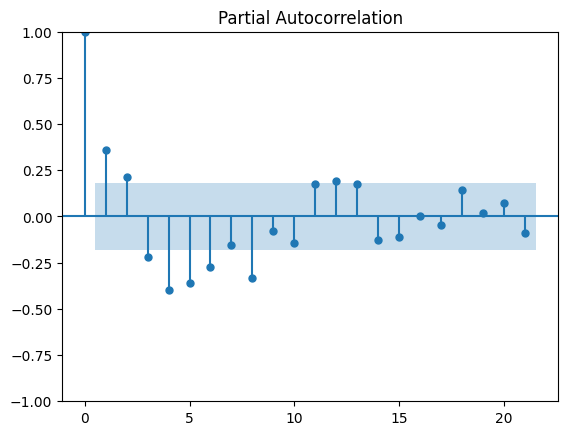

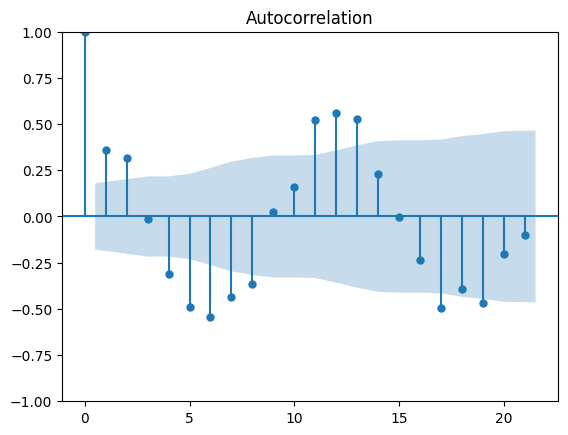

In [20]:
plot_pacf(data_diff_df['Temp']);
plot_acf(data_diff_df['Temp']);

In [21]:
monthly_data['Temp']

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
                ...    
1990-08-31     7.825806
1990-09-30     9.166667
1990-10-31    11.345161
1990-11-30    12.656667
1990-12-31    14.367742
Freq: M, Name: Temp, Length: 120, dtype: float64

In [22]:
model_list=[]

# Displaying the sorted DataFrame

model_list=[]
d=1
D=0
s=12
for ar in range(3):
  for ma in range(3):
    for sar in range(2):
      for sma in range(2):
          try:
            model = SARIMAX(monthly_data['Temp'], order=(ar, 1, ma), seasonal_order=(sar, D, sma, s)).fit(disp=-1)
            aic = model.aic
            model={"ar":ar,"d":"1","ma":ma,"sar":sar,"sma":sma,"s":s,"aic":aic,"model":model}
            print(f"({ar},{d},{ma}) ({sar},{D},{sma} ) {s}")
            model_list.append(model)
          except:
            print("Error estimating model - skipping")

# Creating a DataFrame from the list
model_df = pd.DataFrame(model_list)

# Sorting the DataFrame by the 'aic' column
sorted_model_df = model_df.sort_values(by='aic')

# Displaying the sorted DataFrame
print(sorted_model_df)


(0,1,0) (0,0,0 ) 12
(0,1,0) (0,0,1 ) 12
(0,1,0) (1,0,0 ) 12
(0,1,0) (1,0,1 ) 12
(0,1,1) (0,0,0 ) 12
(0,1,1) (0,0,1 ) 12
(0,1,1) (1,0,0 ) 12
(0,1,1) (1,0,1 ) 12
(0,1,2) (0,0,0 ) 12
(0,1,2) (0,0,1 ) 12
(0,1,2) (1,0,0 ) 12
(0,1,2) (1,0,1 ) 12
(1,1,0) (0,0,0 ) 12
(1,1,0) (0,0,1 ) 12
(1,1,0) (1,0,0 ) 12
(1,1,0) (1,0,1 ) 12
(1,1,1) (0,0,0 ) 12
(1,1,1) (0,0,1 ) 12
(1,1,1) (1,0,0 ) 12
Error estimating model - skipping
(1,1,2) (0,0,0 ) 12
(1,1,2) (0,0,1 ) 12
(1,1,2) (1,0,0 ) 12
Error estimating model - skipping
(2,1,0) (0,0,0 ) 12
(2,1,0) (0,0,1 ) 12
(2,1,0) (1,0,0 ) 12
(2,1,0) (1,0,1 ) 12
(2,1,1) (0,0,0 ) 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2,1,1) (0,0,1 ) 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2,1,1) (1,0,0 ) 12


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(2,1,1) (1,0,1 ) 12
(2,1,2) (0,0,0 ) 12


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(2,1,2) (0,0,1 ) 12
(2,1,2) (1,0,0 ) 12
(2,1,2) (1,0,1 ) 12
    ar  d  ma  sar  sma   s         aic  \
33   2  1   2    1    1  12  383.705394   
11   0  1   2    1    1  12  389.856485   
7    0  1   1    1    1  12  390.406978   
29   2  1   1    1    1  12  394.062429   
15   1  1   0    1    1  12  395.419927   
25   2  1   0    1    1  12  395.518815   
30   2  1   2    0    0  12  399.584973   
31   2  1   2    0    1  12  408.531946   
32   2  1   2    1    0  12  411.907068   
21   1  1   2    1    0  12  415.572990   
3    0  1   0    1    1  12  417.189367   
28   2  1   1    1    0  12  417.877588   
18   1  1   1    1    0  12  418.731017   
6    0  1   1    1    0  12  424.736116   
14   1  1   0    1    0  12  425.449066   
24   2  1   0    1    0  12  426.451510   
10   0  1   2    1    0  12  426.733665   
2    0  1   0    1    0  12  449.124754   
9    0  1   2    0    1  12  458.235794   
20   1  1   2    0    1  12  460.364856   
23   2  1   0    0    1  12  462.8811

In [23]:
sorted_model_df

,ar,d,ma,sar,sma,s,aic,model
33,2,1,2,1,1,12,383.705394,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
11,0,1,2,1,1,12,389.856485,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
7,0,1,1,1,1,12,390.406978,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
29,2,1,1,1,1,12,394.062429,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
15,1,1,0,1,1,12,395.419927,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
25,2,1,0,1,1,12,395.518815,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
30,2,1,2,0,0,12,399.584973,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
31,2,1,2,0,1,12,408.531946,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
32,2,1,2,1,0,12,411.907068,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...
21,1,1,2,1,0,12,415.572990,<statsmodels.tsa.statespace.sarimax.SARIMAXRes...


In [24]:
best_model = sorted_model_df.iloc[0]['model']

In [37]:
start_date= data.index[-1]
end_date=data.index[-1] + pd.DateOffset(months=24)

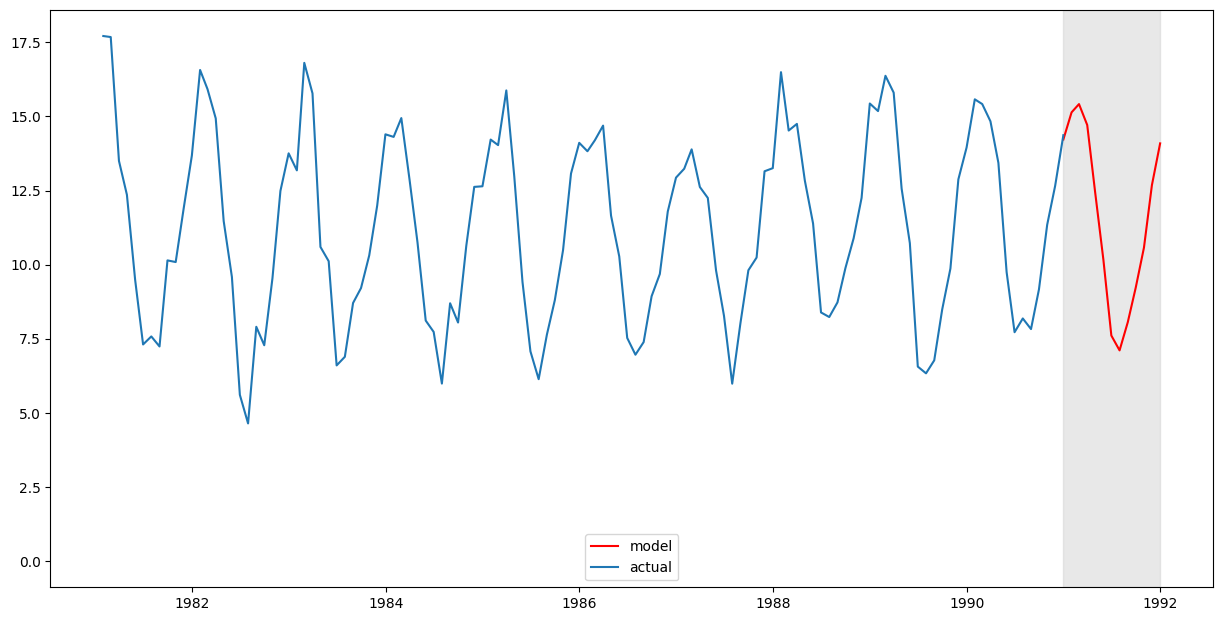

In [36]:
data['arima_model'] = best_model.fittedvalues
data['arima_model'][:4+1] = np.NaN
forecast = best_model.predict(start=start_date, end=end_date)
#forecast = data['arima_model'].append(forecast)
forecast = pd.concat([data['arima_model'], forecast])
plt.figure(figsize=(15, 7.5))
plt.plot(forecast, color='r', label='model')
plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
plt.plot(monthly_data['Temp'], label='actual')
plt.legend()
plt.show()

In [ ]:
results = best_model.fit()
print(results.summary())